In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("C:/Users/ASUS/OneDrive/Documents/Semester 8/Capstone IBM/prabowo_dataset.csv")

# Preprocessing

## Cleaning

In [3]:
import re

def clean_text(text):
    # 1. Lowercasing
    text = text.lower()
    
    # 2. Hapus URL
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # 3. Hapus RT (retweet)
    text = re.sub(r'\brt\b', '', text)
    
    # 4. Hapus mention (@username)
    text = re.sub(r'@\w+', '', text)
    
    # 5. Hapus hashtag (#topik → hanya hilang #, tapi biar kata tetap ada bisa ganti ke '')
    text = re.sub(r'#\w+', '', text)
    
    # 6. Hapus angka & tanda baca (biar cuma huruf + spasi)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # 7. Hapus spasi ganda
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply ke dataset
dataset["Cleaned_Tweet"] = dataset["Tweet Text"].apply(clean_text)

# Lihat hasil
display(dataset[["Tweet Text", "Cleaned_Tweet"]].head(20))


,Tweet Text,Cleaned_Tweet
0,@KangManto123 Agree...utk bisa ngembaliin kepe...,agreeutk bisa ngembaliin kepercayaan mohon mba...
1,"Disambut Hangat di Amsterdam, Presiden Prabowo...",disambut hangat di amsterdam presiden prabowo ...
2,"Laporan Polisi Diabaikan Bertahun-Tahun, Warga...",laporan polisi diabaikan bertahuntahun warga i...
3,Presiden Prabowo Subianto mengungkapkan bahwa ...,presiden prabowo subianto mengungkapkan bahwa ...
4,bangga banget deh sama Pak Prabowo! Indonesia ...,bangga banget deh sama pak prabowo indonesia m...
5,mantap pisan! Pidato tegas Pak Prabowo bikin b...,mantap pisan pidato tegas pak prabowo bikin ba...
6,@hkmhh_syhptra Dukung terus langkah positif da...,dukung terus langkah positif dari program ckg ...
7,"@prabowo 6. @prabowo shock'n dunia Muslim, ny...",shockn dunia muslim nyebut security for israel...
8,"@onoycp Gak perlu pilih-pilih, sekolah rakyat ...",gak perlu pilihpilih sekolah rakyat terbuka bu...
9,@KenSavitri35075 Itu artinya Prabowo mesti was...,itu artinya prabowo mesti waspada terhadap ser...


## Tokenize

In [4]:
import nltk
nltk.download('punkt')

# Fungsi tokenize
def tokenize_text(text):
    # Tokenize kalimat jadi kata-kata
    tokens = nltk.word_tokenize(text)
    # Urutkan alfabetis A-Z
    tokens = sorted(tokens)
    return tokens

# Apply ke dataset
dataset["Tokenized_Tweet"] = dataset["Cleaned_Tweet"].apply(tokenize_text)

# Lihat hasil
display(dataset[["Cleaned_Tweet", "Tokenized_Tweet"]].head(20))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Cleaned_Tweet,Tokenized_Tweet
0,agreeutk bisa ngembaliin kepercayaan mohon mba...,"[agreeutk, bisa, kapolri, ke, kepercayaan, mba..."
1,disambut hangat di amsterdam presiden prabowo ...,"[amsterdam, awali, belanda, di, diplomasi, dis..."
2,laporan polisi diabaikan bertahuntahun warga i...,"[bertahuntahun, copot, dan, desak, diabaikan, ..."
3,presiden prabowo subianto mengungkapkan bahwa ...,"[akan, artefak, artefak, bahwa, belanda, belan..."
4,bangga banget deh sama pak prabowo indonesia m...,"[banget, bangga, deh, indonesia, mantul, pak, ..."
5,mantap pisan pidato tegas pak prabowo bikin ba...,"[banget, bangga, bikin, mantap, pak, pidato, p..."
6,dukung terus langkah positif dari program ckg ...,"[bersama, ckg, dari, dukung, langkah, positif,..."
7,shockn dunia muslim nyebut security for israel...,"[ada, amplify, berarti, bisa, bukan, dukung, d..."
8,gak perlu pilihpilih sekolah rakyat terbuka bu...,"[aja, berkat, buat, gak, perlu, pilihpilih, pr..."
9,itu artinya prabowo mesti waspada terhadap ser...,"[apa, artinya, dari, itu, masalahnya, menginga..."


## Stopwords Removal

In [5]:
import nltk
from nltk.corpus import stopwords

# Download stopwords bahasa Indonesia (sekali saja)
nltk.download('stopwords')

# Ambil stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    # Buang kata yang ada di stopword list
    filtered = [word for word in tokens if word not in stop_words]
    return filtered

# Apply ke dataset
dataset["Stopwords_Tweet"] = dataset["Tokenized_Tweet"].apply(remove_stopwords)

# Lihat hasil
display(dataset[["Tokenized_Tweet", "Stopwords_Tweet"]].head(20))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tokenized_Tweet,Stopwords_Tweet
0,"[agreeutk, bisa, kapolri, ke, kepercayaan, mba...","[agreeutk, kapolri, kepercayaan, mbak, menggan..."
1,"[amsterdam, awali, belanda, di, diplomasi, dis...","[amsterdam, awali, belanda, diplomasi, disambu..."
2,"[bertahuntahun, copot, dan, desak, diabaikan, ...","[bertahuntahun, copot, desak, diabaikan, inhu,..."
3,"[akan, artefak, artefak, bahwa, belanda, belan...","[artefak, artefak, belanda, belanda, belanda, ..."
4,"[banget, bangga, deh, indonesia, mantul, pak, ...","[banget, bangga, deh, indonesia, mantul, prabowo]"
5,"[banget, bangga, bikin, mantap, pak, pidato, p...","[banget, bangga, bikin, mantap, pidato, pisan,..."
6,"[bersama, ckg, dari, dukung, langkah, positif,...","[ckg, dukung, langkah, positif, prabowo, program]"
7,"[ada, amplify, berarti, bisa, bukan, dukung, d...","[amplify, dukung, dukung, dunia, for, hak, hat..."
8,"[aja, berkat, buat, gak, perlu, pilihpilih, pr...","[aja, berkat, gak, pilihpilih, prabowo, rakyat..."
9,"[apa, artinya, dari, itu, masalahnya, menginga...","[mesti, politik, prabowo, presiden, psi, seran..."


## Filtering

In [ ]:
# Filtering berdasarkan panjang token (3–25 huruf)
dataset["Filtered_Tweet"] = dataset["Stopwords_Tweet"].apply(
    lambda tokens: [word for word in tokens if 3 <= len(word) <= 25]
)

display(dataset[["Stopwords_Tweet", "Filtered_Tweet"]].head())


,Stopwords_Tweet,Filtered_Tweet
0,"[agreeutk, kapolri, kepercayaan, mbak, menggan...","[agreeutk, kapolri, kepercayaan, mbak, menggan..."
1,"[amsterdam, awali, belanda, diplomasi, disambu...","[amsterdam, awali, belanda, diplomasi, disambu..."
2,"[bertahuntahun, copot, desak, diabaikan, inhu,...","[bertahuntahun, copot, desak, diabaikan, inhu,..."
3,"[artefak, artefak, belanda, belanda, belanda, ...","[artefak, artefak, belanda, belanda, belanda, ..."
4,"[banget, bangga, deh, indonesia, mantul, prabowo]","[banget, bangga, deh, indonesia, mantul, prabowo]"


# Visualisasi

## Workload

In [7]:
%pip install wordcloud matplotlib
from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.


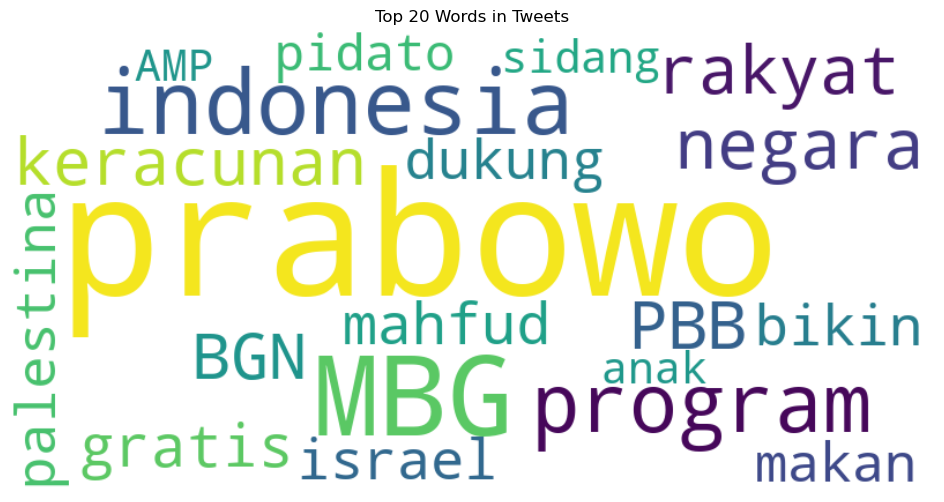

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan semua token dari Filtered_Tweet jadi satu list
all_tokens = [word for tokens in dataset["Filtered_Tweet"] for word in tokens]

# Hapus kata yang tidak ingin muncul
exclude_words = {"presiden", "subianto"}
filtered_tokens = [word for word in all_tokens if word not in exclude_words]

# Ubah kata tertentu menjadi huruf kapital
capitalize_words = {"amp","bgn", "pbb", "mbg"}
filtered_tokens = [word.upper() if word in capitalize_words else word for word in filtered_tokens]

# Hitung frekuensi kata
word_freq = Counter(filtered_tokens)

# Ambil 20 kata teratas
top_words = dict(word_freq.most_common(20))

# Buat Wordcloud
wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_words)

# Plot
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Top 20 Words in Tweets")
plt.show()


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet ID         600 non-null    int64 
 1   Tweet Text       600 non-null    object
 2   Created At       600 non-null    object
 3   Language         600 non-null    object
 4   Author ID        600 non-null    int64 
 5   Likes            600 non-null    int64 
 6   Retweets         600 non-null    int64 
 7   Replies          600 non-null    int64 
 8   Quotes           600 non-null    int64 
 9   Cleaned_Tweet    600 non-null    object
 10  Tokenized_Tweet  600 non-null    object
 11  Stopwords_Tweet  600 non-null    object
 12  Filtered_Tweet   600 non-null    object
dtypes: int64(6), object(7)
memory usage: 61.1+ KB


In [14]:
# Save ke CSV
dataset.to_csv("prabowo_dataset_cleaned.csv", index=False)

In [13]:
dataset['Tweet Text'] = dataset['Tweet Text'].astype(str)
print("Jumlah duplikat di Tweet Text:", dataset['Tweet Text'].duplicated().sum())
print(dataset[dataset['Tweet Text'].duplicated()])


Jumlah duplikat di Tweet Text: 0
Empty DataFrame
Columns: [Tweet ID, Tweet Text, Created At, Language, Author ID, Likes, Retweets, Replies, Quotes, Cleaned_Tweet, Tokenized_Tweet, Stopwords_Tweet, Filtered_Tweet]
Index: []
